In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#読み込み時の型してい
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
#でーた読み込み
ft4=np.load("train.npy")
df4=np.load("test.npy")

In [4]:
#値の標準化
def zscore_wd(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [5]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis)#, keepdims=True)
    xstd  = np.std(x, axis=axis)#, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [6]:
ft4_1=zscore_wd(ft4,axis=1)

In [7]:
del ft4

In [8]:
#くれんデータ分割
X_train, X_test, y_train, y_test =train_test_split(ft4_1,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [9]:
#モデル作成
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout
opt=optimizers.SGD(lr=0.01)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[6000])
y_train,y_valid=np.split(y_train,[6000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(56202,)))
model1.add(Dense(2048))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=50,batch_size=512,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 6000 samples, validate on 2766 samples
Epoch 1/50
 - 6s - loss: 5.0459 - acc: 0.1295 - val_loss: 3.3761 - val_acc: 0.1482
Epoch 2/50
 - 3s - loss: 3.1055 - acc: 0.2275 - val_loss: 2.9424 - val_acc: 0.1576
Epoch 3/50
 - 3s - loss: 2.4209 - acc: 0.3623 - val_loss: 1.8875 - val_acc: 0.5217
Epoch 4/50
 - 3s - loss: 2.0467 - acc: 0.4595 - val_loss: 1.9638 - val_acc: 0.4599
Epoch 5/50
 - 3s - loss: 2.0096 - acc: 0.4793 - val_loss: 1.5202 - val_acc: 0.6117
Epoch 6/50
 - 3s - loss: 1.4568 - acc: 0.6167 - val_loss: 1.3379 - val_acc: 0.6251
Epoch 7/50
 - 3s - loss: 1.2098 - acc: 0.6800 - val_loss: 1.0292 - val_acc: 0.7336
Epoch 8/50
 - 3s - loss: 1.0647 - acc: 0.7273 - val_loss: 0.8917 - val_acc: 0.7643
Epoch 9/50
 - 3s - loss: 0.9412 - acc: 0.7503 - val_loss: 0.8517 - val_acc: 0.7831
Epoch 10/50
 - 3s - loss: 0.8578 - acc: 0.7742 - val_loss: 0.7150 - val_acc: 0.7950
Epoch 11/50
 - 3s - loss: 0.8091 - acc: 0.7880 - val_loss: 0.6138 - val_acc: 0.8424
Epoch 12/50
 - 3s - loss: 0.7131 - ac

In [10]:
pred_y=model1.predict(X_test)

In [11]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.9250513347022588

In [12]:
y_test[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
del ft4_1

In [14]:
del X_train

In [15]:
#以下疾患データにAPPLY
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [16]:
ft2.iloc[:,2:]=zscore(ft2.iloc[:,2:])

In [17]:
#DATAの.以下を削除（VERSION情報を削除）
ft2.iloc[:,0]=ft2.iloc[:,0].str[:15]

In [18]:
ft2

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972,DDX11L1,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,...,-0.007404,-0.023319,-0.012711,-0.010912,-0.019300,-0.013588,-0.032820,-0.012237,-0.016445,-0.026980
1,ENSG00000227232,WASH7P,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,...,-0.005800,-0.006162,-0.008807,-0.007362,-0.010537,-0.007907,-0.010035,-0.003707,-0.009147,-0.007695
2,ENSG00000243485,MIR1302-11,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,...,-0.007408,-0.023464,-0.012786,-0.010847,-0.020043,-0.014089,-0.032945,-0.012531,-0.016621,-0.027120
3,ENSG00000237613,FAM138A,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,...,-0.007442,-0.023422,-0.012733,-0.010892,-0.020043,-0.014076,-0.033045,-0.012493,-0.016637,-0.027150
4,ENSG00000268020,OR4G4P,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032883,-0.012531,-0.016665,-0.027136
5,ENSG00000240361,OR4G11P,-0.083494,-0.058340,-0.050864,-0.051004,-0.031879,-0.036833,-0.046090,-0.064541,...,-0.007415,-0.023434,-0.012752,-0.010912,-0.020043,-0.014140,-0.032963,-0.012531,-0.016629,-0.027202
6,ENSG00000186092,OR4F5,-0.083494,-0.058687,-0.051084,-0.051004,-0.031703,-0.036920,-0.046090,-0.064541,...,-0.007442,-0.023432,-0.012751,-0.010912,-0.020043,-0.014140,-0.032961,-0.012531,-0.016591,-0.027202
7,ENSG00000238009,RP11-34P13.7,-0.082372,-0.058449,-0.050482,-0.050340,-0.031800,-0.036761,-0.045430,-0.063696,...,-0.007404,-0.022480,-0.012475,-0.010864,-0.019518,-0.014026,-0.032485,-0.012486,-0.016582,-0.026988
8,ENSG00000233750,CICP27,-0.082617,-0.057381,-0.050827,-0.050438,-0.031767,-0.036807,-0.045828,-0.064327,...,-0.007342,-0.021741,-0.011556,-0.010864,-0.018940,-0.013815,-0.021154,-0.012399,-0.015030,-0.024695
9,ENSG00000237683,AL627309.1,-0.039070,-0.030180,-0.044233,0.039608,-0.021199,-0.023701,-0.005033,-0.058690,...,0.028562,0.274333,0.191441,0.015378,0.429182,0.036084,0.455581,0.023519,0.183863,0.432192


In [19]:
ft2.sum()

Name                        ENSG00000223972ENSG00000227232ENSG00000243485E...
Description                 DDX11L1WASH7PMIR1302-11FAM138AOR4G4POR4G11POR4...
GTEX-1117F-0226-SM-5GZZ7                                         -1.19839e-10
GTEX-111CU-1826-SM-5GZYN                                          3.65427e-11
GTEX-111FC-0226-SM-5N9B8                                          9.36379e-11
GTEX-111VG-2326-SM-5N9BK                                         -2.87453e-10
GTEX-111YS-2426-SM-5GZZQ                                         -3.08354e-10
GTEX-1122O-2026-SM-5NQ91                                          1.20944e-10
GTEX-1128S-2126-SM-5H12U                                         -5.94928e-10
GTEX-113IC-0226-SM-5HL5C                                          -4.3209e-10
GTEX-117YX-2226-SM-5EGJJ                                         -1.86227e-10
GTEX-11DXW-0326-SM-5H11W                                         -2.03168e-10
GTEX-11DXX-2326-SM-5Q5A2                                        

In [1]:
import collections
import matplotlib.pyplot as plt
tsv=pd.read_csv("patient_data/TCGA-LGG.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
tsv.iloc[:,1:]=zscore(tsv.iloc[:,1:])
tsv.iloc[:,0]=tsv.iloc[:,0].str[:15]

merge_tsv=pd.merge(ft2,tsv, right_on='Ensembl_ID', left_on='Name', how='left')
#print(merge_tsv.shape)
#（先に正規化し）欠損値補完e
merge_tsv2=merge_tsv.transpose()
#print(merge_tsv2.isnull().any().sum())
del merge_tsv
merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[2:ft2.shape[1],:].mean())#,inplace=True)

NameError: name 'pd' is not defined

In [21]:
tsv

,Ensembl_ID,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,...,TCGA-UL-AAZ6-01A,TCGA-UU-A93S-01A,TCGA-V7-A7HQ-01A,TCGA-W8-A86G-01A,TCGA-WT-AB41-01A,TCGA-WT-AB44-01A,TCGA-XX-A899-01A,TCGA-XX-A89A-01A,TCGA-Z7-A8R5-01A,TCGA-Z7-A8R6-01A
0,ENSG00000242268,-0.550884,-0.558885,-0.482103,-0.534410,-0.450460,-0.392349,-0.480268,-0.504137,-0.482429,...,-0.386152,-0.484864,-0.506382,-0.478623,-0.511002,-0.467466,-0.460066,-0.521982,-0.485337,-0.514959
1,ENSG00000270112,-0.550884,-0.553868,-0.540740,-0.530754,-0.526353,-0.540687,-0.511609,-0.504137,-0.539390,...,-0.512334,-0.484864,-0.501730,-0.566303,-0.511002,-0.514594,-0.555179,-0.551679,-0.516688,-0.514959
2,ENSG00000167578,0.979336,1.154157,1.134821,1.124332,0.756860,0.944377,1.247620,1.068333,0.636060,...,1.704364,0.670346,1.559783,1.262156,2.316766,1.404921,0.908495,0.925989,1.392867,1.073910
3,ENSG00000273842,-0.550884,-0.558885,-0.540740,-0.534410,-0.534419,-0.540687,-0.534582,-0.504137,-0.539390,...,-0.518874,-0.484864,-0.506382,-0.570760,-0.511002,-0.514594,-0.562646,-0.551679,-0.521833,-0.514959
4,ENSG00000078237,0.479742,0.384362,0.728202,0.861754,0.562348,0.615178,1.263914,1.555887,0.947166,...,0.931986,1.032362,0.527050,0.624308,0.534036,0.904157,1.087848,0.895052,0.758730,0.829698
5,ENSG00000146083,2.042155,1.748928,2.146005,1.920057,2.147785,2.060834,1.757453,1.634340,2.268060,...,2.310813,1.357036,0.908271,2.258401,1.244878,1.234691,2.263250,2.033516,1.618744,2.036998
6,ENSG00000225275,-0.550884,-0.558885,-0.540740,-0.470049,-0.534419,-0.540687,-0.534582,-0.504137,-0.539390,...,-0.518874,-0.484864,-0.506382,-0.570760,-0.511002,-0.514594,-0.562646,-0.551679,-0.521833,-0.514959
7,ENSG00000158486,-0.547458,-0.024223,-0.537877,-0.506000,-0.530272,-0.516309,-0.445934,-0.498522,-0.533846,...,-0.481425,-0.470121,-0.450577,-0.555597,-0.506520,-0.512308,-0.546120,-0.478573,-0.513050,-0.455867
8,ENSG00000198242,4.321784,4.799082,5.010482,4.740504,4.764750,4.726579,4.779832,4.564249,5.168433,...,5.182611,4.204248,5.368826,4.381622,5.579079,4.694652,4.582619,4.162992,5.177847,4.642796
9,ENSG00000259883,-0.528932,-0.558885,-0.486617,-0.377178,-0.507897,-0.435912,-0.266112,-0.504137,-0.486824,...,-0.476241,-0.332330,-0.237362,-0.407233,-0.120739,-0.429397,-0.445442,-0.328379,-0.455626,-0.449041


In [22]:
merge_tsv2

,0,1,2,3,4,5,6,7,8,9,...,56192,56193,56194,56195,56196,56197,56198,56199,56200,56201
Name,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-1117F-0226-SM-5GZZ7,-0.0829867,0.0169259,-0.0827427,-0.0832577,-0.0834944,-0.0834944,-0.0834944,-0.082372,-0.0826174,-0.0390702,...,57.447,-0.0834944,-0.0834944,-0.0834944,13.4967,17.5323,-0.00822611,32.0886,-0.0791215,-0.0834944
GTEX-111CU-1826-SM-5GZYN,-0.0583051,-0.0223074,-0.0584748,-0.058687,-0.058687,-0.0583404,-0.058687,-0.0584493,-0.0573812,-0.0301803,...,72.5356,-0.0563255,-0.0504018,-0.0563917,12.6692,11.937,-0.0350716,63.2016,-0.058687,-0.058687
GTEX-111FC-0226-SM-5N9B8,-0.0510231,-0.00299469,-0.0509493,-0.050999,-0.0510835,-0.0508642,-0.0510835,-0.0504823,-0.0508272,-0.0442334,...,77.7236,-0.0480977,-0.0493368,-0.0510835,9.48629,9.11594,-0.0376416,61.5313,-0.0510835,-0.043507
GTEX-111VG-2326-SM-5N9BK,-0.0509375,-0.0275787,-0.0510043,-0.0509108,-0.0510043,-0.0510043,-0.0510043,-0.0503398,-0.0504376,0.0396078,...,53.2957,-0.047702,-0.0490736,-0.0510043,6.57936,6.93768,-0.0344957,37.2716,-0.0492783,-0.0493291
GTEX-111YS-2426-SM-5GZZQ,-0.0318787,-0.0181583,-0.0317736,-0.0318787,-0.0318787,-0.0318787,-0.0317029,-0.0318002,-0.0317672,-0.0211987,...,91.2699,-0.0295406,-0.0305111,-0.0307422,10.6893,9.33838,0.0242533,66.402,-0.0306562,-0.0283187
GTEX-1122O-2026-SM-5NQ91,-0.0368241,-0.0174737,-0.0369204,-0.0369204,-0.0369204,-0.036833,-0.0369204,-0.0367606,-0.0368069,-0.0237007,...,87.9629,-0.0345383,-0.035528,-0.0369204,10.67,10.5932,0.0178383,71.8195,-0.0356756,-0.0345051
GTEX-1128S-2126-SM-5H12U,-0.0460108,-0.0199795,-0.0457364,-0.0458674,-0.0458035,-0.0460905,-0.0460905,-0.0454297,-0.0458276,-0.00503305,...,92.5339,-0.0460905,-0.0460905,-0.0460905,7.97371,6.91165,-0.0283594,63.9102,-0.0419718,-0.0440912
GTEX-113IC-0226-SM-5HL5C,-0.0642011,-0.0153542,-0.0637864,-0.0640654,-0.0643367,-0.0645406,-0.0645406,-0.0636961,-0.0643272,-0.0586897,...,69.3622,-0.0617432,-0.0645406,-0.0645406,29.0446,49.811,0.12009,53.4383,-0.0382208,-0.0503469


In [ ]:
#predictmerge_tsv2.iloc[ft2.shape[1]+1:,:]
del merge_tsv2
#merged_tsv3.iloc[ft2.shape[1]+1:,:]=zscore(merged_tsv3.iloc[ft2.shape[1]+1:,:],axis=1)
predict_patient_classes=model1.predict(merged_tsv3.iloc[ft2.shape[1]+1:,:].values)
print(predict_patient_classes[:3])
del merged_tsv3
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
del predict_patient_classes 
np.savetxt("TCGA-LGG.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()

In [ ]:
del tsv

## 以下参考
* 平均化確認のためのヒストグラム
* メモリ確認

(array([4.0493e+04, 2.8520e+03, 3.6960e+03, 2.2470e+03, 1.3650e+03,
        8.7500e+02, 5.3800e+02, 6.4300e+02, 1.8500e+02, 6.0000e+00]),
 array([0.        , 0.89427693, 1.78855385, 2.68283078, 3.57710771,
        4.47138464, 5.36566156, 6.25993849, 7.15421542, 8.04849234,
        8.94276927]),
 <a list of 10 Patch objects>)

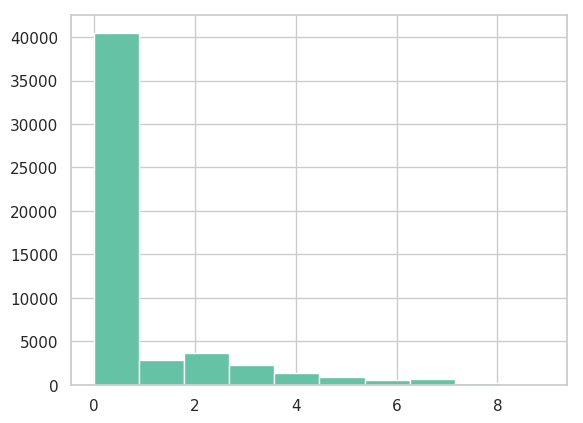

In [25]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0771e+04, 3.2950e+03, 3.6180e+03, 2.4480e+03, 8.0000e+02,
        9.6600e+02, 5.7800e+02, 3.9400e+02, 2.8000e+01, 2.0000e+00]),
 array([  0.        ,  21.0990017 ,  42.19800341,  63.29700511,
         84.39600682, 105.49500852, 126.59401023, 147.69301193,
        168.79201364, 189.89101534, 210.99001705]),
 <a list of 10 Patch objects>)

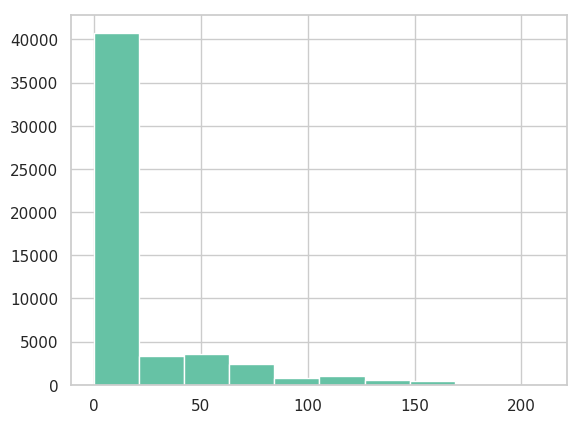

In [27]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0289e+04, 2.8640e+03, 3.7270e+03, 2.3030e+03, 1.4610e+03,
        8.4800e+02, 5.6300e+02, 6.4400e+02, 1.9600e+02, 5.0000e+00]),
 array([-0.59264485,  0.04633357,  0.68531199,  1.32429041,  1.96326883,
         2.60224725,  3.24122567,  3.88020408,  4.5191825 ,  5.15816092,
         5.79713934]),
 <a list of 10 Patch objects>)

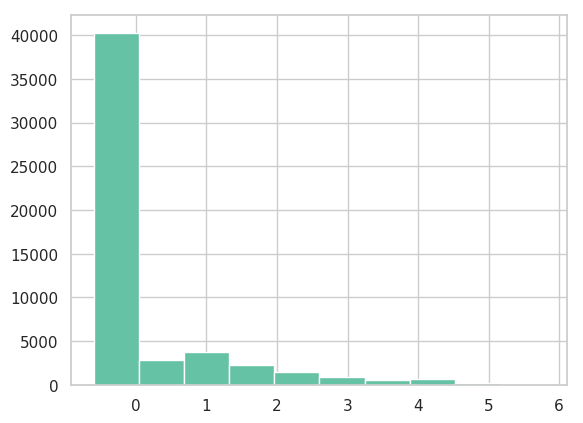

In [29]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

In [50]:
%matplotlib inline

In [25]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                   X_test         |1313778064
|                      df4         |2805232
|                      ft2         |5262837465
|                merge_tsv         |5457850489
|                   pred_y         |350752
|                      tsv         |209513216
|                   y_test         |701392


In [26]:
del merge_tsv